In [1]:
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd



In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd

data = pd.read_csv('GSE196134-Ready.csv')
data.set_index('Gene Symbol', inplace=True)


In [3]:
data

,Control (1),Control (2),Control (3),Control (4),Control (5),Control (6),Control (7),Control (8),Control (9),Control (10),...,RSVB (36),RSVB (37),RSVB (38),RSVB (39),RSVB (40),RSVB (41),RSVB (42),RSVB (43),RSVB (44),RSVB (45)
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC112268260,9,4,9,7,7,8,11,8,6,6,...,9,4,7,5,5,6,10,8,3,7
OR4F29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
LOC105378947,5,0,2,0,0,0,1,0,2,0,...,0,0,0,0,0,0,2,2,0,0
OR4F16,2,4,3,2,1,3,8,3,1,1,...,1,7,3,2,0,2,5,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND4L,43357,35932,41780,34731,52052,42033,36002,33610,34681,35233,...,12785,12050,13181,14297,9690,18164,18266,16440,18798,14774
ND4,205232,181452,206841,178955,234671,201877,167495,156635,166642,170693,...,56089,49482,53732,55493,39574,73377,71883,67132,82873,61530
ND5,139372,122005,148013,117738,125140,126644,99087,102581,99613,104755,...,35152,30794,36308,32792,23963,40296,48644,38203,45347,39464


In [4]:
data.columns

Index(['Control (1)', 'Control (2)', 'Control (3)', 'Control (4)',
       'Control (5)', 'Control (6)', 'Control (7)', 'Control (8)',
       'Control (9)', 'Control (10)', 'Control (11)', 'Control (12)',
       'Control (13)', 'Control (14)', 'Control (15)', 'Control (16)',
       'Control (17)', 'Control (18)', 'Control (19)', 'Control (20)',
       'Control (21)', 'Control (22)', 'Control (23)', 'Control (24)',
       'Control (25)', 'Control (26)', 'Control (27)', 'Control (28)',
       'Control (29)', 'Control (30)', 'Control (31)', 'Control (32)',
       'Control (33)', 'Control (34)', 'Control (35)', 'Control (36)',
       'Control (37)', 'Control (38)', 'Control (39)', 'Control (40)',
       'Control (41)', 'Control (42)', 'Control (43)', 'Control (44)',
       'Control (45)', 'RSVB (1)', 'RSVB (2)', 'RSVB (3)', 'RSVB (4)',
       'RSVB (5)', 'RSVB (6)', 'RSVB (7)', 'RSVB (8)', 'RSVB (9)', 'RSVB (10)',
       'RSVB (11)', 'RSVB (12)', 'RSVB (13)', 'RSVB (14)', 'RSVB (15)',
     

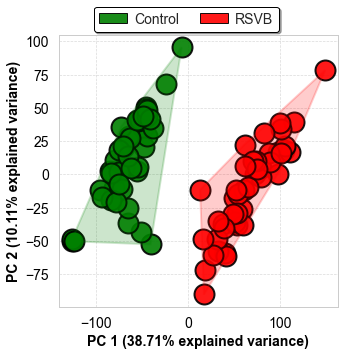

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
from matplotlib.patches import Patch

data_transposed = data.transpose()

scaler = StandardScaler()
data_scaled = np.log2((data_transposed + 1))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=data_transposed.index)

explained_variance = pca.explained_variance_ratio_
explained_variance_percentages = ['{:.2%}'.format(v) for v in explained_variance]

principal_df['Group'] = principal_df.index.to_series().apply(lambda x: x.split('(')[0].strip())
groups = principal_df['Group'].unique()

colors = ['green', 'red',]
color_map = {group: color for group, color in zip(groups, colors)}

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5, 5))

for label in groups:
    indices = principal_df['Group'] == label
    position = principal_df.loc[indices, ['PC1', 'PC2']].values
    
    if position.shape[0] < 3:
        continue  
    
    hull = ConvexHull(position)
    polygon = Polygon(position[hull.vertices], closed=True, facecolor=color_map[label], alpha=0.2, edgecolor=color_map[label], linewidth=2)
    ax.add_patch(polygon)

    ax.scatter(position[:, 0], position[:, 1], s=400, color=color_map[label], label=label,
               edgecolor='black', alpha=0.9, linewidth=2)
explained_variance = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f'PC 1 ({explained_variance[0]:.2f}% explained variance)', fontsize=14, fontweight='bold', color='black')
ax.set_ylabel(f'PC 2 ({explained_variance[1]:.2f}% explained variance)', fontsize=14, fontweight='bold', color='black')

ax.tick_params(axis='both', which='major', labelsize=14, colors='black', pad=10, width=2)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

legend_elements = [Patch(facecolor=color_map[label], edgecolor='black', label=label, alpha=0.9) for label in groups]
legend = ax.legend(handles=legend_elements, fontsize=14, title_fontsize=14, loc='upper left',
                   bbox_to_anchor=(0.1, 1.13), ncol=3, frameon=True, edgecolor='black', columnspacing=1.5,
                   handletextpad=0.5, labelspacing=.5, fancybox=True, shadow=True, framealpha=1)

plt.show()


In [7]:
import pandas as pd
import numpy as np

data.index.name = "Gene Symbol"

control_cols = [col for col in data.columns if col.startswith("Control")]
rsvb_cols = [col for col in data.columns if col.startswith("RSVB")]

swap_sizes = [1, 2,3,4, 5]
files_per_case = 20

for i, swap_n in enumerate(swap_sizes):
    for j in range(files_per_case):
        controls = control_cols.copy()
        rsvbs = rsvb_cols.copy()

        swapped_ctrl = np.random.choice(controls, swap_n, replace=False)
        swapped_rsvb = np.random.choice(rsvbs, swap_n, replace=False)

        for col in swapped_ctrl:
            controls.remove(col)
        for col in swapped_rsvb:
            rsvbs.remove(col)

        new_controls = controls + list(swapped_rsvb)
        new_rsvbs = rsvbs + list(swapped_ctrl)

        new_control_names = [f"Control ({k+1})" for k in range(len(new_controls))]
        new_rsvb_names = [f"RSVB ({k+1})" for k in range(len(new_rsvbs))]

        df_sim = pd.concat([data[new_controls], data[new_rsvbs]], axis=1)
        df_sim.columns = new_control_names + new_rsvb_names

        fname = f"simulated_counts_case{i * files_per_case + j + 1}.csv"
        df_sim.to_csv(fname)

        print(f"{fname}: Swapped Control → RSVB: {list(swapped_ctrl)}, Swapped RSVB → Control: {list(swapped_rsvb)}")


simulated_counts_case1.csv: Swapped Control → RSVB: ['Control (8)'], Swapped RSVB → Control: ['RSVB (36)']
simulated_counts_case2.csv: Swapped Control → RSVB: ['Control (23)'], Swapped RSVB → Control: ['RSVB (8)']
simulated_counts_case3.csv: Swapped Control → RSVB: ['Control (19)'], Swapped RSVB → Control: ['RSVB (17)']
simulated_counts_case4.csv: Swapped Control → RSVB: ['Control (3)'], Swapped RSVB → Control: ['RSVB (44)']
simulated_counts_case5.csv: Swapped Control → RSVB: ['Control (37)'], Swapped RSVB → Control: ['RSVB (38)']
simulated_counts_case6.csv: Swapped Control → RSVB: ['Control (17)'], Swapped RSVB → Control: ['RSVB (7)']
simulated_counts_case7.csv: Swapped Control → RSVB: ['Control (35)'], Swapped RSVB → Control: ['RSVB (17)']
simulated_counts_case8.csv: Swapped Control → RSVB: ['Control (18)'], Swapped RSVB → Control: ['RSVB (35)']
simulated_counts_case9.csv: Swapped Control → RSVB: ['Control (10)'], Swapped RSVB → Control: ['RSVB (43)']
simulated_counts_case10.csv: Swa

simulated_counts_case61.csv: Swapped Control → RSVB: ['Control (2)', 'Control (36)', 'Control (6)', 'Control (30)'], Swapped RSVB → Control: ['RSVB (39)', 'RSVB (40)', 'RSVB (28)', 'RSVB (25)']
simulated_counts_case62.csv: Swapped Control → RSVB: ['Control (26)', 'Control (41)', 'Control (11)', 'Control (17)'], Swapped RSVB → Control: ['RSVB (23)', 'RSVB (43)', 'RSVB (40)', 'RSVB (16)']
simulated_counts_case63.csv: Swapped Control → RSVB: ['Control (40)', 'Control (2)', 'Control (24)', 'Control (22)'], Swapped RSVB → Control: ['RSVB (38)', 'RSVB (5)', 'RSVB (7)', 'RSVB (26)']
simulated_counts_case64.csv: Swapped Control → RSVB: ['Control (26)', 'Control (11)', 'Control (4)', 'Control (14)'], Swapped RSVB → Control: ['RSVB (10)', 'RSVB (15)', 'RSVB (24)', 'RSVB (23)']
simulated_counts_case65.csv: Swapped Control → RSVB: ['Control (34)', 'Control (31)', 'Control (11)', 'Control (23)'], Swapped RSVB → Control: ['RSVB (2)', 'RSVB (40)', 'RSVB (16)', 'RSVB (5)']
simulated_counts_case66.csv:

In [11]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import pearsonr, spearmanr, kendalltau


gt = pd.read_csv("EdgeR_GroundTruth_GSE196134-Ready.csv")
gt["label"] = (gt["Bonferroni_pvalue"] < 0.05).astype(int)
gt_labels = gt.set_index("GeneSymbol")["label"]
gt_logfc = gt.set_index("GeneSymbol")["logFC"]
gt_pval = gt.set_index("GeneSymbol")["PValue"]


n_sig_gt = (gt["label"] == 1).sum()

swap_sizes = [1, 2,3,4,5]
case_to_swap = {}
case_idx = 1
for swap in swap_sizes:
    for _ in range(20):
        case_to_swap[case_idx] = swap
        case_idx += 1

results = []

for case_num in range(1, 101):
    df = pd.read_csv(f"EdgeR_Case{case_num}.csv")
    df["label"] = (df["Bonferroni_pvalue"] < 0.05).astype(int)
    case_labels = df.set_index("GeneSymbol")["label"]
    case_logfc = df.set_index("GeneSymbol")["logFC"]
    case_pval = df.set_index("GeneSymbol")["PValue"]


    merged = pd.DataFrame({
        "gt": gt_labels,
        "gt_logfc": gt_logfc,
        "gt_pval": gt_pval,
        "case": case_labels,
        "case_logfc": case_logfc,
        "case_pval": case_pval
    }).fillna(0)

    precision = precision_score(merged["gt"], merged["case"])
    recall = recall_score(merged["gt"], merged["case"])
    f1 = f1_score(merged["gt"], merged["case"])
    swap_n = case_to_swap[case_num]

    sig_gt = set(merged[merged["gt"] == 1].index)
    sig_case = set(merged[merged["case"] == 1].index)
    overlap = sig_gt & sig_case
    lost = sig_gt - sig_case
    gained = sig_case - sig_gt

    jaccard = len(overlap) / len(sig_gt | sig_case) if (sig_gt | sig_case) else 0
    lost_ratio = len(lost) / n_sig_gt if n_sig_gt else 0
    gained_ratio = len(gained) / n_sig_gt if n_sig_gt else 0
    overlap_ratio = len(overlap) / n_sig_gt if n_sig_gt else 0

    sig_both = merged.loc[overlap]

    if len(sig_both) > 1:
        pearson_corr, _ = pearsonr(sig_both["gt_logfc"], sig_both["case_logfc"])
        spearman_corr, _ = spearmanr(sig_both["gt_logfc"], sig_both["case_logfc"])
    else:
        pearson_corr = None
        spearman_corr = None

    direction_change = ((sig_both["gt_logfc"] * sig_both["case_logfc"]) < 0).sum()

    if len(merged) > 1:
        spearman_rank, _ = spearmanr(merged["gt_logfc"], merged["case_logfc"])
        kendall_rank, _ = kendalltau(merged["gt_logfc"], merged["case_logfc"])
    else:
        spearman_rank = None
        kendall_rank = None

    pval_diff = (merged["case_pval"] - merged["gt_pval"]).mean()

    results.append({
        "Case": case_num,
        "SwapNum": swap_n,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Jaccard": jaccard,
        "Lost": len(lost),
        "Gained": len(gained),
        "Overlap": len(overlap),
        "LostRatio": lost_ratio,
        "GainedRatio": gained_ratio,
        "OverlapRatio": overlap_ratio,
       "Pearson_logFC": pearson_corr,
        "Spearman_logFC": spearman_corr,
        "Direction_Change": direction_change,
       "Spearman_Rank": spearman_rank,
        "Kendall_Rank": kendall_rank,
        "pval_MeanDiff": pval_diff
    })
    
    


results_df = pd.DataFrame(results)
results_df.to_csv("EdgeR_OutlierSensitivity_Results.csv", index=False)
display(results_df)  


,Case,SwapNum,Precision,Recall,F1,Jaccard,Lost,Gained,Overlap,LostRatio,GainedRatio,OverlapRatio,Pearson_logFC,Spearman_logFC,Direction_Change,Spearman_Rank,Kendall_Rank,pval_MeanDiff
0,1,1,0.997791,0.939106,0.967559,0.937157,410,14,6323,0.060894,0.002079,0.939106,0.992345,0.999815,0,0.993362,0.965983,0.002585
1,2,1,0.994102,0.926184,0.958942,0.921123,497,37,6236,0.073816,0.005495,0.926184,0.986713,0.999709,0,0.991395,0.957353,0.005766
2,3,1,0.989626,0.935096,0.961588,0.926019,437,66,6296,0.064904,0.009802,0.935096,0.988135,0.999664,0,0.990280,0.952818,0.004033
3,4,1,0.979907,0.934353,0.956588,0.916788,442,129,6291,0.065647,0.019159,0.934353,0.991607,0.999522,0,0.991662,0.952470,0.005058
4,5,1,0.988095,0.949205,0.968260,0.938473,342,77,6391,0.050795,0.011436,0.949205,0.991765,0.999727,0,0.990868,0.956048,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,5,0.998227,0.668944,0.801067,0.668150,2229,8,4504,0.331056,0.001188,0.668944,0.968190,0.998355,0,0.953640,0.866976,0.025619
96,97,5,0.995535,0.662261,0.795398,0.660299,2274,20,4459,0.337739,0.002970,0.662261,0.962176,0.998503,0,0.955813,0.874226,0.025142
97,98,5,0.995305,0.661221,0.794574,0.659165,2281,21,4452,0.338779,0.003119,0.661221,0.959821,0.998005,0,0.937997,0.853211,0.027386
98,99,5,0.990940,0.682311,0.808163,0.678081,2139,42,4594,0.317689,0.006238,0.682311,0.967215,0.997761,0,0.941636,0.847490,0.021695


In [12]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import pearsonr, spearmanr, kendalltau

gt = pd.read_csv("DESeq2_GroundTruth.csv")
gt["label"] = (gt["Bonferroni_pvalue"] < 0.05).astype(int)
gt_labels = gt.set_index("GeneSymbol")["label"]
gt_logfc = gt.set_index("GeneSymbol")["logFC"]
gt_pval = gt.set_index("GeneSymbol")["PValue"]


n_sig_gt = (gt["label"] == 1).sum()

swap_sizes = [1, 2,3,4,5]
case_to_swap = {}
case_idx = 1
for swap in swap_sizes:
    for _ in range(20):
        case_to_swap[case_idx] = swap
        case_idx += 1

results = []

for case_num in range(1, 101):
    df = pd.read_csv(f"DESeq2-Case{case_num}.csv")
    df["label"] = (df["Bonferroni_pvalue"] < 0.05).astype(int)
    case_labels = df.set_index("GeneSymbol")["label"]
    case_logfc = df.set_index("GeneSymbol")["logFC"]
    case_pval = df.set_index("GeneSymbol")["PValue"]


    merged = pd.DataFrame({
        "gt": gt_labels,
        "gt_logfc": gt_logfc,
        "gt_pval": gt_pval,
        "case": case_labels,
        "case_logfc": case_logfc,
        "case_pval": case_pval
    }).fillna(0)

    precision = precision_score(merged["gt"], merged["case"])
    recall = recall_score(merged["gt"], merged["case"])
    f1 = f1_score(merged["gt"], merged["case"])
    swap_n = case_to_swap[case_num]

    sig_gt = set(merged[merged["gt"] == 1].index)
    sig_case = set(merged[merged["case"] == 1].index)
    overlap = sig_gt & sig_case
    lost = sig_gt - sig_case
    gained = sig_case - sig_gt

    jaccard = len(overlap) / len(sig_gt | sig_case) if (sig_gt | sig_case) else 0
    lost_ratio = len(lost) / n_sig_gt if n_sig_gt else 0
    gained_ratio = len(gained) / n_sig_gt if n_sig_gt else 0
    overlap_ratio = len(overlap) / n_sig_gt if n_sig_gt else 0

    sig_both = merged.loc[overlap]

    if len(sig_both) > 1:
        pearson_corr, _ = pearsonr(sig_both["gt_logfc"], sig_both["case_logfc"])
        spearman_corr, _ = spearmanr(sig_both["gt_logfc"], sig_both["case_logfc"])
    else:
        pearson_corr = None
        spearman_corr = None

    direction_change = ((sig_both["gt_logfc"] * sig_both["case_logfc"]) < 0).sum()

    if len(merged) > 1:
        spearman_rank, _ = spearmanr(merged["gt_logfc"], merged["case_logfc"])
        kendall_rank, _ = kendalltau(merged["gt_logfc"], merged["case_logfc"])
    else:
        spearman_rank = None
        kendall_rank = None

    pval_diff = (merged["case_pval"] - merged["gt_pval"]).mean()

    results.append({
        "Case": case_num,
        "SwapNum": swap_n,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Jaccard": jaccard,
        "Lost": len(lost),
        "Gained": len(gained),
        "Overlap": len(overlap),
        "LostRatio": lost_ratio,
        "GainedRatio": gained_ratio,
        "OverlapRatio": overlap_ratio,
       "Pearson_logFC": pearson_corr,
        "Spearman_logFC": spearman_corr,
        "Direction_Change": direction_change,
       "Spearman_Rank": spearman_rank,
        "Kendall_Rank": kendall_rank,
        "pval_MeanDiff": pval_diff
    })

results_df = pd.DataFrame(results)
results_df.to_csv("DESeq2_OutlierSensitivity_Results.csv", index=False)
display(results_df)  


,Case,SwapNum,Precision,Recall,F1,Jaccard,Lost,Gained,Overlap,LostRatio,GainedRatio,OverlapRatio,Pearson_logFC,Spearman_logFC,Direction_Change,Spearman_Rank,Kendall_Rank,pval_MeanDiff
0,1,1,0.995784,0.944992,0.969724,0.941227,385,28,6614,0.055008,0.004001,0.944992,0.997885,0.999812,0,0.996233,0.968583,0.004510
1,2,1,0.994690,0.936705,0.964827,0.932044,443,35,6556,0.063295,0.005001,0.936705,0.997341,0.999746,0,0.995200,0.963307,0.006066
2,3,1,0.989475,0.940277,0.964249,0.930966,418,70,6581,0.059723,0.010001,0.940277,0.997172,0.999667,0,0.992769,0.955130,0.004040
3,4,1,0.980226,0.941992,0.960729,0.924425,406,133,6593,0.058008,0.019003,0.941992,0.996818,0.999498,0,0.993573,0.952587,0.006280
4,5,1,0.987164,0.955994,0.971329,0.944256,308,87,6691,0.044006,0.012430,0.955994,0.997071,0.999716,0,0.992905,0.956887,0.000760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,5,0.998354,0.693099,0.818182,0.692308,2148,8,4851,0.306901,0.001143,0.693099,0.977519,0.998296,0,0.970031,0.888061,0.027197
96,97,5,0.997084,0.683955,0.811356,0.682589,2212,14,4787,0.316045,0.002000,0.683955,0.976587,0.998439,0,0.967389,0.884700,0.028075
97,98,5,0.995431,0.684812,0.811410,0.682666,2206,22,4793,0.315188,0.003143,0.684812,0.979353,0.998241,0,0.964046,0.879298,0.030689
98,99,5,0.988793,0.705958,0.823775,0.700354,2058,56,4941,0.294042,0.008001,0.705958,0.977509,0.997631,0,0.957983,0.864273,0.026218


SwapNum 1: p = 0.0385
SwapNum 2: p = 0.0123
SwapNum 3: p = 0.0003
SwapNum 4: p = 0.0066
SwapNum 5: p = 0.0133


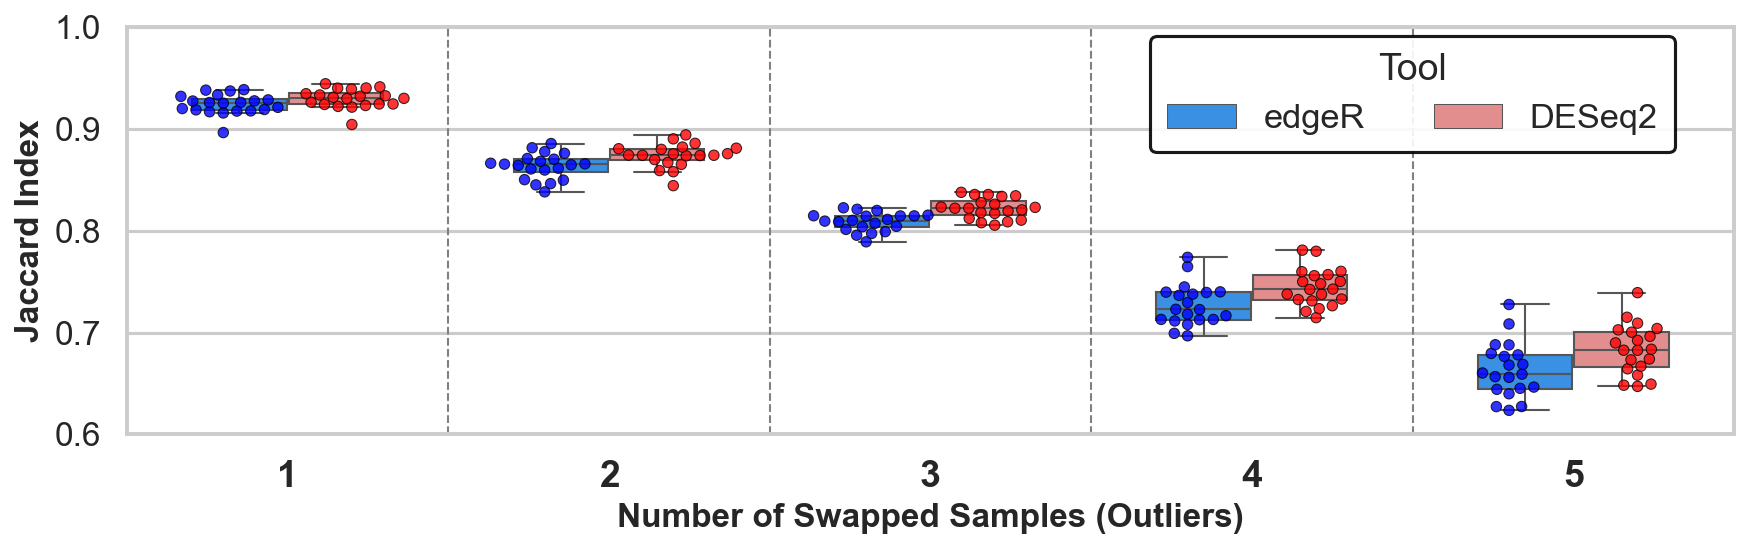

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


edger = pd.read_csv("EdgeR_OutlierSensitivity_Results.csv")
deseq2 = pd.read_csv("DESeq2_OutlierSensitivity_Results.csv")


edger["Tool"] = "edgeR"
deseq2["Tool"] = "DESeq2"


combined = pd.concat([
    edger[["SwapNum", "Jaccard", "Tool"]],
    deseq2[["SwapNum", "Jaccard", "Tool"]]
])

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 4), dpi=150)


ax = sns.boxplot(x="SwapNum", y="Jaccard", hue="Tool", data=combined,
                 palette={"edgeR": "dodgerblue", "DESeq2": "lightcoral"},
                 linewidth=1.0, fliersize=0, width=0.6)


sns.swarmplot(x="SwapNum", y="Jaccard", hue="Tool", data=combined,
              palette={"edgeR": "blue", "DESeq2": "red"},
              dodge=True, size=5, alpha=0.8, linewidth=0.5, edgecolor="black")

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[:2],
    labels[:2],
    title="Tool",
    loc="lower center",
    bbox_to_anchor=(0.8, 0.65),
    ncol=2,
    frameon=True,
    fancybox=True,
    framealpha=0.9,
    borderpad=.5,
    edgecolor="black"
)

import numpy as np


unique_swaps = sorted(combined["SwapNum"].unique())


group_count = len(unique_swaps)
for i in np.arange(0.5, group_count - 0.5, 1.0):
    ax.axvline(x=i, color='gray', linestyle='--', linewidth=1)


for i, swap in enumerate(unique_swaps):
    edger_vals = combined[(combined["SwapNum"] == swap) & (combined["Tool"] == "edgeR")]["Jaccard"]
    deseq_vals = combined[(combined["SwapNum"] == swap) & (combined["Tool"] == "DESeq2")]["Jaccard"]

    if len(edger_vals) > 0 and len(deseq_vals) > 0:
        stat, p = mannwhitneyu(edger_vals, deseq_vals, alternative="two-sided")
        print(f"SwapNum {swap}: p = {p:.4f}")


ax.set_xlabel("Number of Swapped Samples (Outliers)", fontsize=16, weight='bold')
ax.set_ylabel("Jaccard Index", fontsize=16, weight='bold')
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=18, fontweight='bold')
ax.set_ylim(0.6, 1)

plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd


edger = pd.read_csv("EdgeR_OutlierSensitivity_Results.csv")
deseq2 = pd.read_csv("DESeq2_OutlierSensitivity_Results.csv")


edger["Tool"] = "edgeR"
deseq2["Tool"] = "DESeq2"


combined = pd.concat([
    edger[["SwapNum", "Jaccard", "Tool"]],
    deseq2[["SwapNum", "Jaccard", "Tool"]]
])


unique_swaps = sorted(combined["SwapNum"].unique())


for swap in unique_swaps:
    print(f"\nSwapNum = {swap}")
    for tool in ["edgeR", "DESeq2"]:
        values = combined[(combined["SwapNum"] == swap) & (combined["Tool"] == tool)]["Jaccard"]
        mean_val = values.mean()
        median_val = values.median()
        std_val = values.std()
        print(f"  {tool}: Mean = {mean_val:.3f}, Median = {median_val:.3f}, Std = {std_val:.3f}")



SwapNum = 1
  edgeR: Mean = 0.924, Median = 0.926, Std = 0.010
  DESeq2: Mean = 0.930, Median = 0.930, Std = 0.009

SwapNum = 2
  edgeR: Mean = 0.863, Median = 0.865, Std = 0.013
  DESeq2: Mean = 0.874, Median = 0.874, Std = 0.011

SwapNum = 3
  edgeR: Mean = 0.809, Median = 0.810, Std = 0.009
  DESeq2: Mean = 0.822, Median = 0.822, Std = 0.010

SwapNum = 4
  edgeR: Mean = 0.727, Median = 0.723, Std = 0.020
  DESeq2: Mean = 0.744, Median = 0.743, Std = 0.018

SwapNum = 5
  edgeR: Mean = 0.663, Median = 0.660, Std = 0.027
  DESeq2: Mean = 0.684, Median = 0.683, Std = 0.024
